In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-website-detector/phishing.txt
/kaggle/input/phishing-website-detector/phishing.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('always') 


In [3]:
filepath = "../input/phishing-website-detector/phishing.csv"
data = pd.read_csv(filepath)
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [5]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [6]:
X = data.drop(columns="class")
X

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,1,-1,1,-1,1,0,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,3,1,0,-1,1,1,-1,1,1,-1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,1,-1,1,0,1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,1,-1,1,1,1,1,-1,1,1,1


In [7]:
Y=data["class"]
Y=pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3,random_state=2)

In [9]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7737, 31)
(7737, 1)
(3317, 31)
(3317, 1)


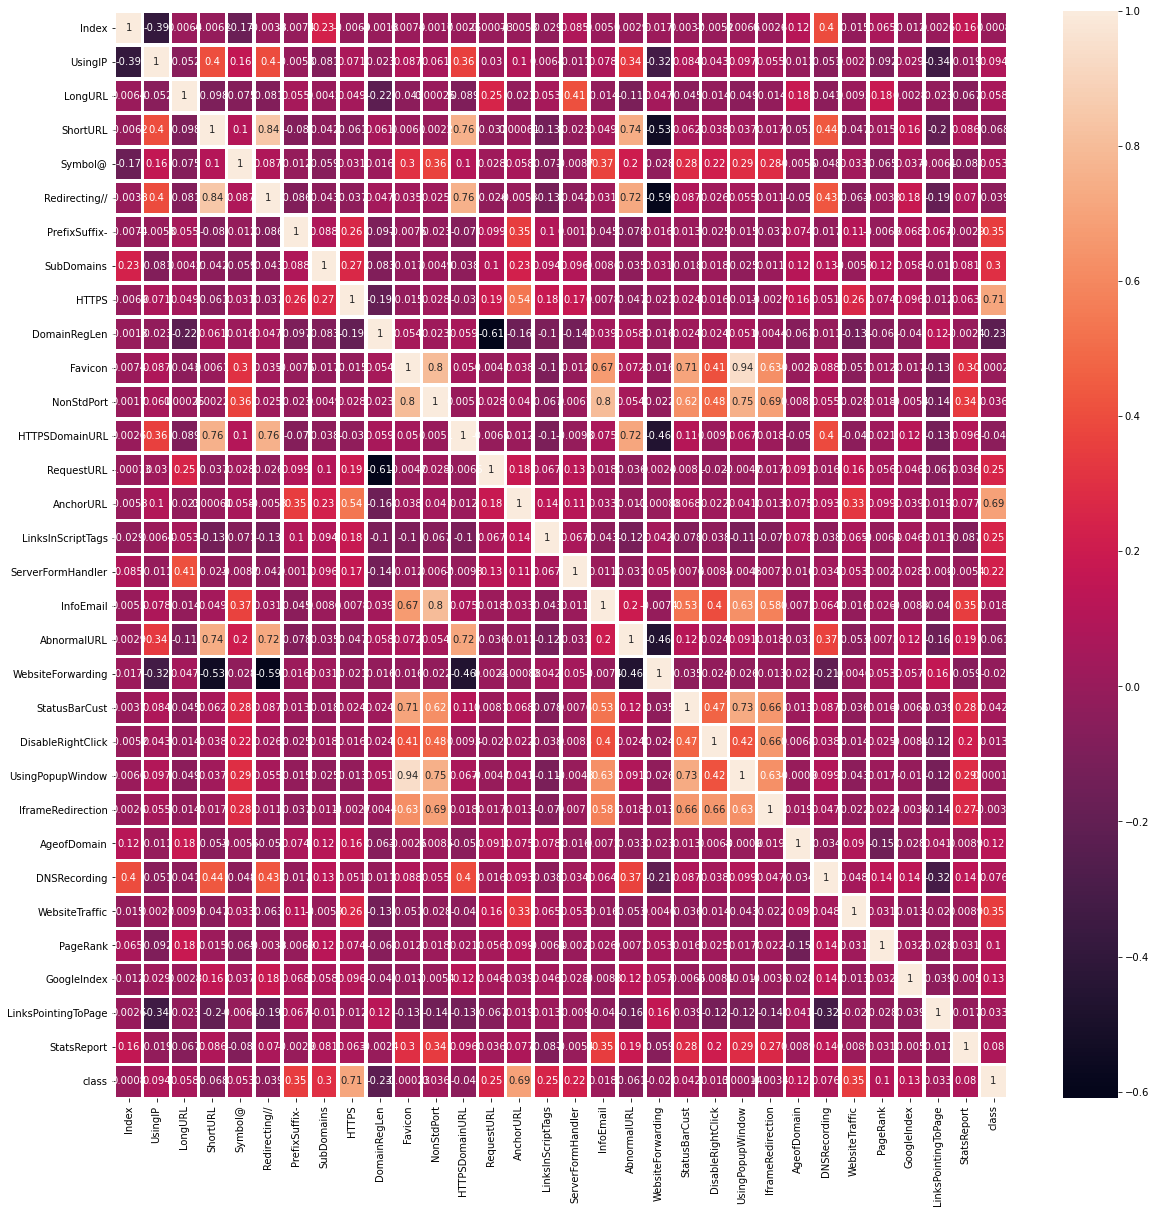

In [10]:
corr = data.corr()
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidth=2.5,ax=ax)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9276454627675611
              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



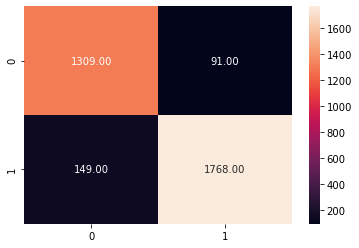

In [11]:

lg=LogisticRegression()
model1=lg.fit(train_X,train_Y)
lg_predict = lg.predict(test_X)
acc_lg=accuracy_score(lg_predict,test_Y)
print(acc_lg)
print(classification_report(lg_predict,test_Y))
con  = confusion_matrix(lg_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5604461863129334
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


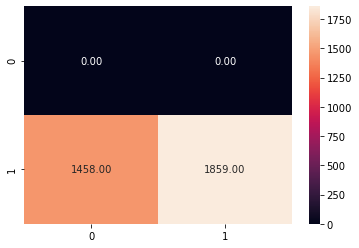

In [12]:
svc=SVC()
model2=svc.fit(train_X,train_Y)
svc_predict = svc.predict(test_X)
acc_svc = accuracy_score(test_Y, svc_predict)
print(acc_svc)
print(classification_report(svc_predict,test_Y))
con  = confusion_matrix(svc_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9475429605064818
              precision    recall  f1-score   support

          -1       0.92      0.96      0.94      1410
           1       0.97      0.94      0.95      1907

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



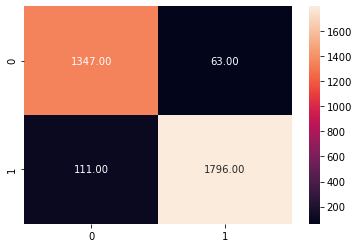

In [13]:
gbc = GradientBoostingClassifier()
model3=gbc.fit(train_X,train_Y)
gbc_predict = gbc.predict(test_X)
acc_gbc = accuracy_score(test_Y, gbc_predict)
print(acc_gbc)
print(classification_report(gbc_predict,test_Y))
con  = confusion_matrix(gbc_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')


0.9472414832680133
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      1419
           1       0.96      0.94      0.95      1898

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



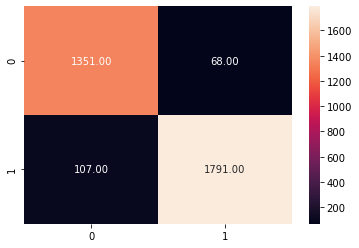

In [14]:
tree = DecisionTreeClassifier()
model5=tree.fit(train_X,train_Y)
tree_predict = tree.predict(test_X)
acc_tree = accuracy_score(test_Y, tree_predict)
print(acc_tree)
print(classification_report(tree_predict,test_Y))
con  = confusion_matrix(tree_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9710581851070245
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1434
           1       0.98      0.97      0.97      1883

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



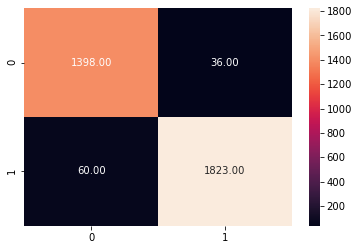

In [15]:
forest = RandomForestClassifier()
model6 = forest.fit(train_X,train_Y)
forest_predict = forest.predict(test_X)
acc_forest = accuracy_score(test_Y, forest_predict)
print(acc_forest)
print(classification_report(forest_predict,test_Y))
con  = confusion_matrix(forest_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.6044618631293337
              precision    recall  f1-score   support

          -1       0.52      0.55      0.54      1380
           1       0.67      0.64      0.65      1937

    accuracy                           0.60      3317
   macro avg       0.60      0.60      0.60      3317
weighted avg       0.61      0.60      0.61      3317



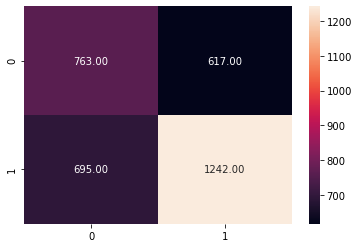

In [16]:
knn=KNeighborsClassifier()
model7=knn.fit(train_X,train_Y)
knn_predict = knn.predict(test_X)
acc_knn = accuracy_score(test_Y, knn_predict)
print(acc_knn)
print(classification_report(knn_predict,test_Y))
con  = confusion_matrix(knn_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.899005125113054
              precision    recall  f1-score   support

          -1       0.90      0.87      0.89      1499
           1       0.90      0.92      0.91      1818

    accuracy                           0.90      3317
   macro avg       0.90      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



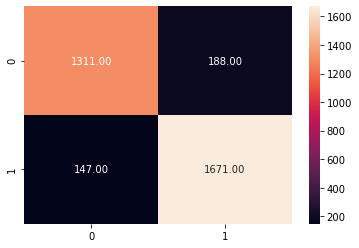

In [17]:
sgd =SGDClassifier()
model8=sgd.fit(train_X,train_Y)
sgd_predict = sgd.predict(test_X)
acc_sgd = accuracy_score(test_Y, sgd_predict)
print(acc_sgd)
print(classification_report(sgd_predict,test_Y))
con  = confusion_matrix(sgd_predict,test_Y)
sns.heatmap(con,annot=True,fmt='.2f')

In [18]:
print('Logistic Regression Accuracy:',round(acc_lg*100,2))
print('K-Nearest Neighbour Accuracy:',round(acc_knn*100,2))
print('Decision Tree Classifier Accuracy:',round(acc_tree*100,2))
print('Random Forest Classifier Accuracy:',round(acc_forest*100,2))
print('support Vector Machine Accuracy:',round(acc_svc*100,2))
print('GradientBoost Classifier Accuracy:',round(acc_gbc*100,2))
print('SGD Accuracy:',round(acc_sgd*100,2))

Logistic Regression Accuracy: 92.76
K-Nearest Neighbour Accuracy: 60.45
Decision Tree Classifier Accuracy: 94.72
Random Forest Classifier Accuracy: 97.11
support Vector Machine Accuracy: 56.04
GradientBoost Classifier Accuracy: 94.75
SGD Accuracy: 89.9


Random Forest Classifier has highest accuracy of 97.10%

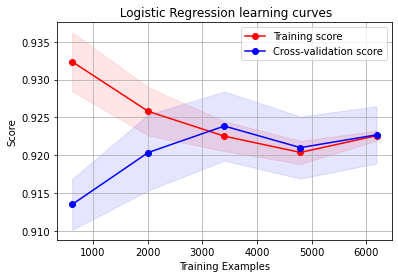

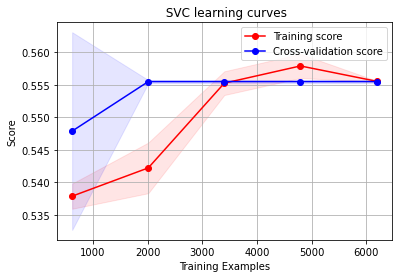

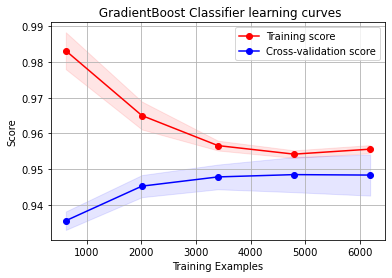

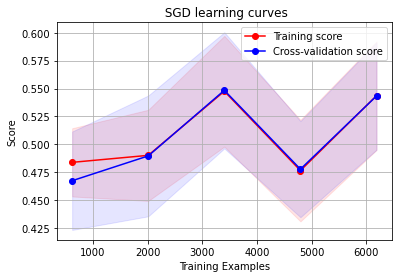

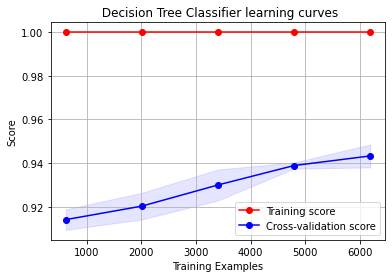

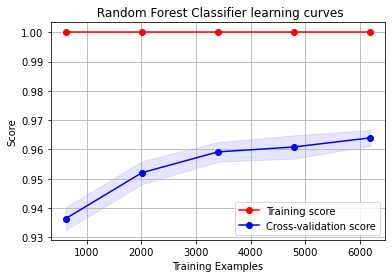

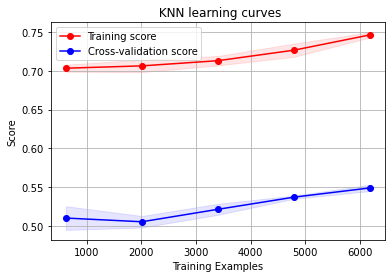

In [19]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=-1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(model1," Logistic Regression learning curves",train_X,train_Y)
g = plot_learning_curve(model2," SVC learning curves",train_X,train_Y)
g = plot_learning_curve(model3," GradientBoost Classifier learning curves",train_X,train_Y)
g = plot_learning_curve(model8," SGD learning curves",train_X,train_Y)
g = plot_learning_curve(model5," Decision Tree Classifier learning curves",train_X,train_Y)
g = plot_learning_curve(model6," Random Forest Classifier learning curves",train_X,train_Y)
g = plot_learning_curve(model7," KNN learning curves",train_X,train_Y)
